# Integrated Project: 
## Insurance Customer Retention Through Incident Severity Prediction

© Explore Data Science Academy

---

Image

<a id="cont"></a>
## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Importing Packages</a>

<a href=#three>3. Loading Datasets</a>

<a href=#four>4. Data Preprocessing</a>

<a href=#five>5. Exploratory Data Analysis</a>

<a href=#six>6. Feature Engineering</a>

<a href=#seven>7. Splitting the Data</a>

<a href=#eight>8. Balancing Classes</a>

<a href=#nine>9. Model Building</a>

<a href=#ten>10. Model Evaluation</a><a id="cont"></a>

 <a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

---

Start: Africa holds only x% of insurance despite having x% of world population etc, introduction to insurance and customer retention, affiliation and reducing customer churn. What are some factors that influence customer retention. I have chosen to focus on incident severity detection, discuss how this can impact customer retention and affiliation.

### Problem Statement

???

### Dataset Description

Consists of what, where did the data come from. Consists of motor vehicle claims that were made between 2015-01-01 and 2015-03-01.

#### Class Description
- `Total loss`: 
- `Major damage`: 
- `Minor damage`: 
- `Trivial damage`: 

#### Relevant Feature Description:
- `policy_number`: Unique customer identifier
- `incident_date`: Date incident occurred
- `incident_type`: Description of type of incident that occurred
- `collision_type`: Desciption of type of collision that occurred
- `authorities_contacted`: Type of authority that was contacted following incident
- `incident_state`: Stae in which incident occurred
- `incident_city`: City in which incident occurred
- `incident_location`: Street address at which incident occurred
- `incident_hour_of_the_day`: Hour at which incident occurred
- `number_of_vehicles_involved`: Number of vehicles involved in incident
- `property_damage`: Incident whether or not property was damaged
- `bodily_injuries`: Number of bodily injuries
- `police_report_available`: Indicates whether or not a police report is available
- `total_claim_amount`: Total monetary claim amount
- `injury_claim`: Amount claimed for bodily injuries
- `property_claim`: Amount claimed for property damage
- `vehicle_claim`: Amount claimed for vehicle damage
- `auto_make`: Vehicle brand
- `auto_model`: Vehicle model
- `auto_year`: Year of manufacturing

Incident severity prediction can indirectly impact customer retention and affiliation in several ways:

Improved Customer Experience: By accurately predicting the severity of insurance incidents, insurers can respond more effectively and efficiently to customers' needs. Customers who experience smoother and more satisfactory claim processes are more likely to remain loyal to their insurance provider.

Faster Claim Settlement: Predicting incident severity allows insurers to prioritize claims based on their potential impact, ensuring that critical cases are addressed promptly. Faster claim settlement times contribute to higher customer satisfaction and trust in the insurance company, increasing the likelihood of retention.

Personalized Customer Support: Understanding the severity of an incident enables insurers to provide personalized support to customers based on their specific needs. For example, in cases of high-severity incidents, insurers can offer additional assistance or resources to help customers navigate through the claims process, demonstrating care and support that enhances customer loyalty.

Effective Resource Allocation: Predicting incident severity helps insurers allocate resources more effectively, such as claims adjusters, emergency services, and support staff. By efficiently deploying resources to handle high-severity incidents, insurers can ensure timely assistance to customers, reducing frustration and dissatisfaction that could lead to churn.

Risk Mitigation: Identifying high-severity incidents allows insurers to proactively assess and mitigate risks in specific regions or demographics. By addressing potential risks before they escalate into severe incidents, insurers can protect their customers and assets, fostering trust and confidence among policyholders.

Competitive Advantage: Insurance companies that excel in predicting incident severity and providing superior customer support gain a competitive edge in the market. Satisfied customers are more likely to renew their policies and recommend the insurer to others, increasing customer retention and affiliation.

In summary, incident severity prediction indirectly contributes to customer retention and affiliation by enhancing the overall customer experience, facilitating faster claim settlement, providing personalized support, optimizing resource allocation, mitigating risks, and gaining a competitive advantage in the insurance industry. By prioritizing customer satisfaction and well-being, insurers can foster long-term relationships with policyholders and strengthen their brand loyalty.

 <a id="two"></a>
## 2. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---


In [39]:
# Interacting with the data
import numpy as np
import pandas as pd

# Visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder

# Sampling
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier

# Model evaulation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
import warnings
warnings.filterwarnings('ignore')

 <a id="three"></a>
## 3. Loading Datasets
<a href=#cont>Back to Table of Contents</a>

---


In [3]:
df = pd.read_excel('../Data/Insurance Claims Data - Cleaned.xlsx')

In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


 <a id="four"></a>
## 4. Data Preprocessing
<a href=#cont>Back to Table of Contents</a>

---


As our aim is to predict incident severity, we will start by dropping features that are not relevant to the incident.

In [5]:
# Drop irrelevant features
df = df.drop(['months_as_customer','age','policy_bind_date','policy_state','policy_csl',
              'policy_deductable','policy_annual_premium','umbrella_limit', 'insured_zip',
              'insured_sex','insured_education_level', 'insured_occupation', 'insured_hobbies',
              'insured_relationship','capital-gains', 'capital-loss','witnesses','fraud_reported'
             ],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   policy_number                1000 non-null   int64         
 1   incident_date                1000 non-null   datetime64[ns]
 2   incident_type                1000 non-null   object        
 3   collision_type               1000 non-null   object        
 4   incident_severity            1000 non-null   object        
 5   authorities_contacted        909 non-null    object        
 6   incident_state               1000 non-null   object        
 7   incident_city                1000 non-null   object        
 8   incident_location            1000 non-null   object        
 9   incident_hour_of_the_day     1000 non-null   int64         
 10  number_of_vehicles_involved  1000 non-null   int64         
 11  property_damage              1000 non-null  

In [7]:
df.isna().any()

policy_number                  False
incident_date                  False
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted           True
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                False
bodily_injuries                False
police_report_available        False
total_claim_amount             False
injury_claim                   False
property_claim                 False
vehicle_claim                  False
auto_make                      False
auto_model                     False
auto_year                      False
dtype: bool

The majority of data preprocessing was performed in Microsoft Excel prior to loading the dataset. However, the following must still be addressed:
- Remove redundant features: the feature `policy_number` is a unique customer identifier and provides no additional information relating to the claim.
- Normalizing the case of text data to avoid discrepancies.
- Address missing values: despite imputing data into missing values during data cleaning, the 'None' category in the feature `authorities_contacted` is being identified as a NaN value.
- The features `collision_type`, `property_damage` and `police_report` contain '?' where the catgory is unknown

In [8]:
# Remove policy_number feature
df = df.drop('policy_number', axis=1)

In [9]:
# Normalize case of text columns to avoid inconsistencies
def lowercase_strings(x):
    if isinstance(x, str):
        return x.lower()
    else:
        return x

df = df.applymap(lowercase_strings)

In [10]:
# Replace NaN values with the string 'none'
df['authorities_contacted'] = df['authorities_contacted'].fillna('none')

In [11]:
# Replace '?' datapoints with 'unknown'
df = df.replace('?', 'unknown')

**Note:** Maybe keep some demographics to start with, use EDA to see if there are any relationships?

In [12]:
df.head()

,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,2015-01-25,single vehicle collision,side collision,major damage,police,sc,columbus,9935 4th drive,5,1,yes,1,yes,71610,6510,13020,52080,saab,92x,2004
1,2015-01-21,vehicle theft,unknown,minor damage,police,va,riverwood,6608 mlk hwy,8,1,unknown,0,unknown,5070,780,780,3510,mercedes,e400,2007
2,2015-02-22,multi-vehicle collision,rear collision,minor damage,police,ny,columbus,7121 francis lane,7,3,no,2,no,34650,7700,3850,23100,dodge,ram,2007
3,2015-01-10,single vehicle collision,front collision,major damage,police,oh,arlington,6956 maple drive,5,1,unknown,1,no,63400,6340,6340,50720,chevrolet,tahoe,2014
4,2015-02-17,vehicle theft,unknown,minor damage,none,ny,arlington,3041 3rd ave,20,1,no,0,no,6500,1300,650,4550,accura,rsx,2009


 <a id="five"></a>
## 5. Exploratory Data Analysis
<a href=#cont>Back to Table of Contents</a>

---


#### Incident Severity

In [13]:
# Counts of incident severity
df['incident_severity'].value_counts()

incident_severity
minor damage      354
total loss        280
major damage      276
trivial damage     90
Name: count, dtype: int64

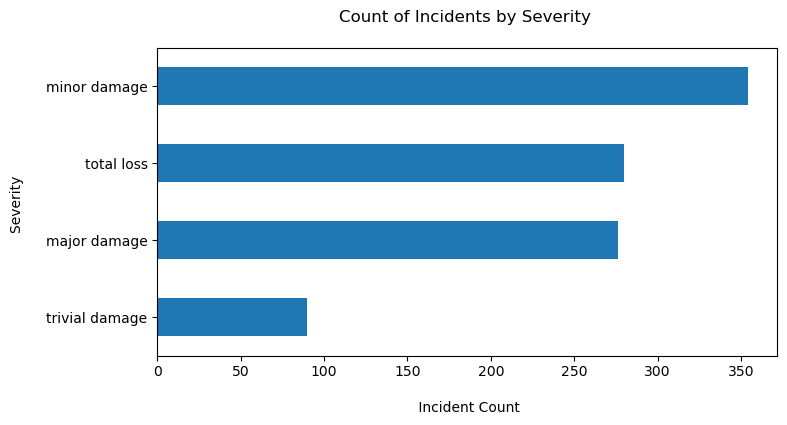

In [14]:
severity_counts = df['incident_severity'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(8,4))
severity_counts.plot(kind='barh')
plt.title('Count of Incidents by Severity \n')
plt.xlabel('\n Incident Count')
plt.ylabel('Severity \n')
plt.show()

Minor damage accounts for the majority of claims, with trivial damage being the minority.

In [15]:
# Create separate DataFrames for each category
minor = df[df['incident_severity'] == 'minor damage']
trivial = df[df['incident_severity'] == 'trivial damage']
major = df[df['incident_severity'] == 'major damage']
total_loss = df[df['incident_severity'] == 'total loss']

#### Datetime Analysis

In [16]:
# Day of week
# Months
# Weeks
# Time of day

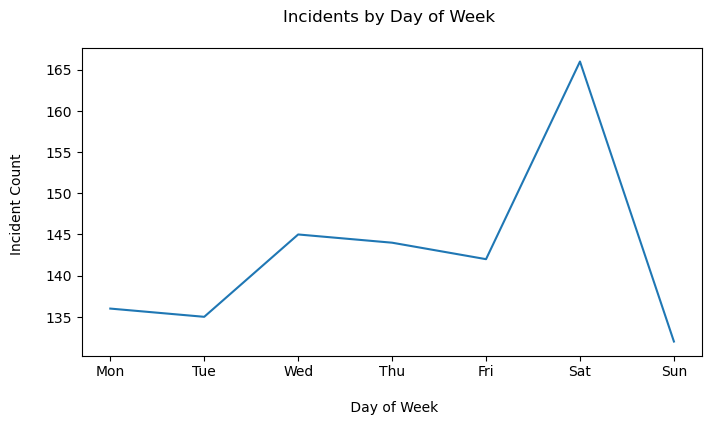

In [17]:
weekdays = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
weekday_counts = df['incident_date'].dt.weekday.value_counts().sort_index()

plt.figure(figsize=(8,4))
weekday_counts.plot()
plt.title('Incidents by Day of Week \n')
plt.xlabel('\n Day of Week')
plt.ylabel('Incident Count \n')
plt.xticks(range(0,len(weekdays)),weekdays)
plt.show()

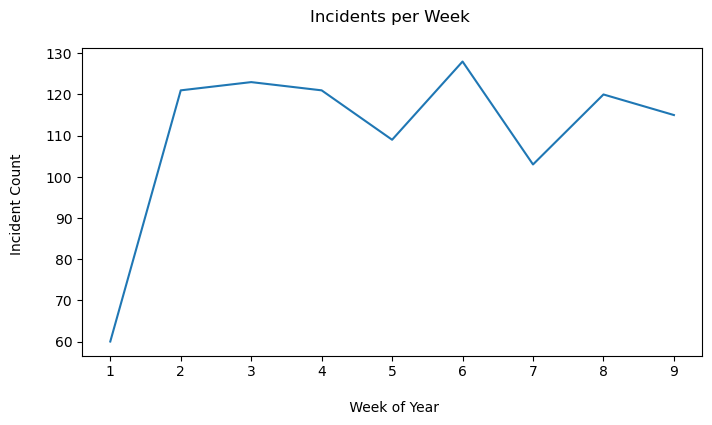

In [18]:
week_of_year_counts = df['incident_date'].dt.isocalendar().week.value_counts().sort_index()

plt.figure(figsize=(8,4))
week_of_year_counts.plot()
plt.title('Incidents per Week \n')
plt.xlabel('\n Week of Year')
plt.ylabel('Incident Count \n')
plt.show()

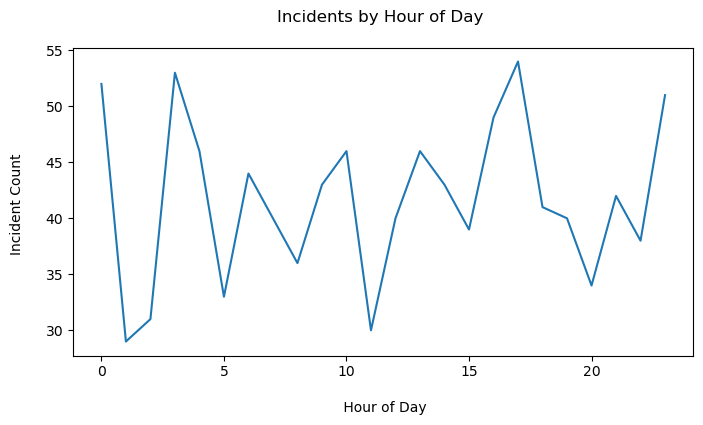

In [19]:
hour_counts = df['incident_hour_of_the_day'].value_counts().sort_index()

plt.figure(figsize=(8,4))
hour_counts.plot()
plt.title('Incidents by Hour of Day \n')
plt.xlabel('\n Hour of Day')
plt.ylabel('Incident Count \n')
#plt.xticks(range(0,len(weekdays)),weekdays)
plt.show()

 <a id="six"></a>
## 6. Feature Engineering
<a href=#cont>Back to Table of Contents</a>

---


**Note:** We will start by building and running models with only basic feature engineering - datetime, one hot encoding and label encoding, to allow the models to run. Later we can then add features and see if they improve the model. We drop incident location because they are all unique.

In [20]:
df = df.drop(['incident_location'],axis=1)

#### Date

In [21]:
def extract_time_features(df):
    
    '''
    Extracts year, month, day and weekday features from the 'incident_date' column.
    
    Parameters:
    -----------
    df: DataFrame
        A pandas DataFrame containing a column named 'incident_date'
    
    Returns:
    --------
    df: DataFrame
        A pandas DataFrame with new columns for 'incident_year','incident_month', 'incident_day'
        and 'incident_weekday' and the 'incident_date' column dropped.
    '''
    
    # Extract the relevant time features
    df['incident_year'] = df['incident_date'].dt.year
    df['incident_month'] = df['incident_date'].dt.month
    df['incident_week'] = df['incident_date'].dt.isocalendar().week
    df['incident_day'] = df['incident_date'].dt.day
    df['incident_weekday'] = df['incident_date'].dt.weekday
    
    # Drop the 'incident_date' feature
    df = df.drop('incident_date', axis=1)
    
    return df

df = extract_time_features(df)

#### Vehicle models

In [22]:
df['auto_model'].unique()

array(['92x', 'e400', 'ram', 'tahoe', 'rsx', 95, 'pathfinder', 'a5',
       'camry', 'f150', 'a3', 'highlander', 'neon', 'mdx', 'maxima',
       'legacy', 'tl', 'impreza', 'forrestor', 'escape', 'corolla',
       '3 series', 'c300', 'wrangler', 'm5', 'x5', 'civic', 'passat',
       'silverado', 'crv', 93, 'accord', 'x6', 'malibu', 'fusion',
       'jetta', 'ml350', 'ultima', 'grand cherokee'], dtype=object)

We can simplify the list of individual vehicle models by categorizing them by vehicle body shape:

In [23]:
def auto_shape_indicator(df):
    
    '''
    Assigns an 'auto_shape' value to each row in the DataFrame based on the 'auto_model' value.
    
    Parameters:
    -----------
    df: DataFrame
        A pandas DataFrame containing a column named 'auto_model'.
    
    Returns:
    --------
    Series: A pandas Series containing the assigned 'auto_shape' value.
    
    Notes:
    ------
    This function assumes that the input DataFrame contains a column named 'auto_model' with the model
    names of the vehicles.
    '''
    
    if df['auto_model'] in ['ram','f150','silverado']:
        return 'pickup'
    elif df['auto_model'] in ['92x','95','93']:
        return 'wagon'
    elif df['auto_model'] in ['tahoe','pathfinder','highlander','mdx','forrestor','escape','wrangler',
                              'x5','crv','x6','malibu','fusion','ml350','grand cherokee']:
        return 'suv'
    else:
        return 'sedan'

#df['auto_shape'] = df.apply(auto_shape_indicator, axis=1)

#### Vehicle Age

In [24]:
#df['auto_age'] = df['incident_year'] - df['auto_year']

#### Incident Location

In [25]:
# Urban vs rural
# Highway, street, avenue etc

#### Variable Encoding

In [26]:
# Dummy variable encoding
# Label encoder
# Ordinal encoding?

In [27]:
# Label encoding
label_encoder = LabelEncoder()
df['incident_severity'] = label_encoder.fit_transform(df['incident_severity'])

LabelEncoder assigns labels to classes in alphabetical order. After transforming the label, the classes are as follows:
- `0`: major damage
- `1`: minor damage
- `2`: total loss
- `3`" trivial damage

for df dummies: incident_type, collision_type, authorities_contacted, incident_state, incident_city, property_damage, police_report_available, auto_make

In [28]:
# Dummy variable encoding
df_dummies = pd.get_dummies(df, drop_first=True, dtype=int)

#### Interaction Terms

In [29]:
# Number of vehicles involved * boodiily injuries

In [30]:
df_dummies.head()

,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,incident_year,...,auto_model_pathfinder,auto_model_ram,auto_model_rsx,auto_model_silverado,auto_model_tahoe,auto_model_tl,auto_model_ultima,auto_model_wrangler,auto_model_x5,auto_model_x6
0,0,5,1,1,71610,6510,13020,52080,2004,2015,...,0,0,0,0,0,0,0,0,0,0
1,1,8,1,0,5070,780,780,3510,2007,2015,...,0,0,0,0,0,0,0,0,0,0
2,1,7,3,2,34650,7700,3850,23100,2007,2015,...,0,1,0,0,0,0,0,0,0,0
3,0,5,1,1,63400,6340,6340,50720,2014,2015,...,0,0,0,0,1,0,0,0,0,0
4,1,20,1,0,6500,1300,650,4550,2009,2015,...,0,0,1,0,0,0,0,0,0,0


 <a id="seven"></a>
## 7. Splitting the Data
<a href=#cont>Back to Table of Contents</a>

---


In [31]:
X = df_dummies.drop('incident_severity', axis=1)
y = df_dummies['incident_severity']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 <a id="eight"></a>
## 8. Balancing Classes
<a href=#cont>Back to Table of Contents</a>

---


 <a id="nine"></a>
## 9. Model Building
<a href=#cont>Back to Table of Contents</a>

---


In [36]:
def base_model(X_train, y_train, X_test, model):
    
    '''
    Docstring
    '''
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    return predictions

In [41]:
def evaluate_model(actual, predicted):
    
    '''
    Docstring
    '''
    
    print('Classification Report \n')
    print(classification_report(actual, predicted))
    print('\n')
    print('Confusion Matrix')
    
    cm = confusion_matrix(actual, predicted)
    disp = ConfusionMatrixDisplay(cm, display_labels=['major','minor','total loss','trivial'])
    disp.plot(cmap='Blues')

### Logistic Regression

Classification Report 

              precision    recall  f1-score   support

           0       0.37      0.21      0.27        61
           1       0.38      0.51      0.44        74
           2       0.19      0.18      0.19        44
           3       0.58      0.67      0.62        21

    accuracy                           0.36       200
   macro avg       0.38      0.39      0.38       200
weighted avg       0.36      0.36      0.35       200



Confusion Matrix


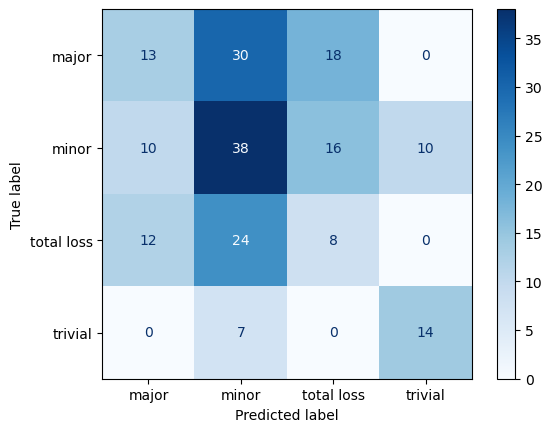

In [42]:
# Instantiate the base model
lm = LogisticRegression()

# Generate predictions
y_pred_lm = base_model(X_train, y_train, X_test, lm)

# Evaluate the model performance
evaluate_model(y_test, y_pred_lm)

### Decision Tree

Classification Report 

              precision    recall  f1-score   support

           0       0.29      0.20      0.24        61
           1       0.29      0.30      0.29        74
           2       0.25      0.34      0.29        44
           3       0.50      0.57      0.53        21

    accuracy                           0.30       200
   macro avg       0.33      0.35      0.34       200
weighted avg       0.30      0.30      0.30       200



Confusion Matrix


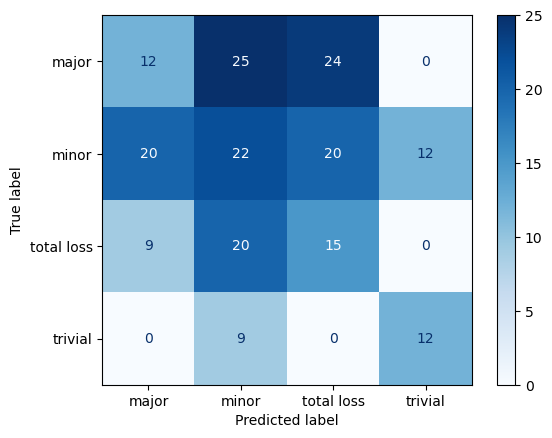

In [43]:
# Instantiate the base model
dt = DecisionTreeClassifier()

# Generate predictions
y_pred_dt = base_model(X_train, y_train, X_test, dt)

# Evaluate the model performance
evaluate_model(y_test, y_pred_dt)

### Support Vector Machine

#### SVC

Classification Report 

              precision    recall  f1-score   support

           0       0.14      0.02      0.03        61
           1       0.42      0.22      0.29        74
           2       0.27      0.95      0.42        44
           3       0.00      0.00      0.00        21

    accuracy                           0.29       200
   macro avg       0.21      0.30      0.18       200
weighted avg       0.26      0.29      0.21       200



Confusion Matrix


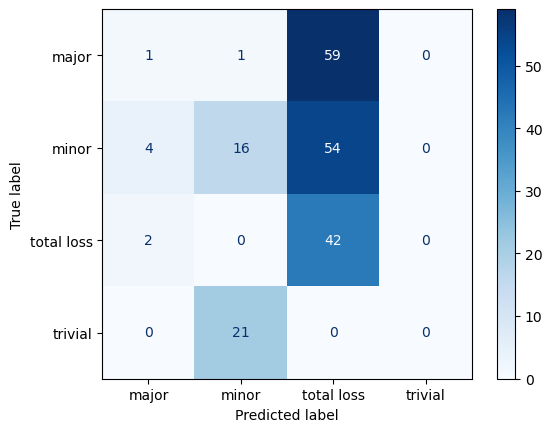

In [44]:
# Instantiate the base model
svc = SVC()

# Generate predictions
y_pred_svc = base_model(X_train, y_train, X_test, svc)

# Evaluate the model performance
evaluate_model(y_test, y_pred_svc)

#### Linear SVC

Classification Report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.43      0.04      0.07        74
           2       0.00      0.00      0.00        44
           3       0.11      1.00      0.20        21

    accuracy                           0.12       200
   macro avg       0.13      0.26      0.07       200
weighted avg       0.17      0.12      0.05       200



Confusion Matrix


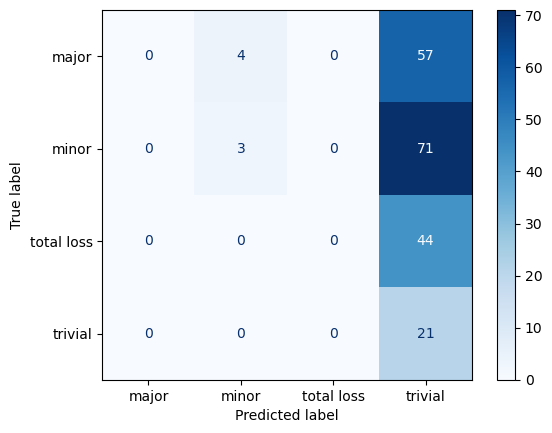

In [45]:
# Instantiate the base model
linsvc = LinearSVC()

# Generate predictions
y_pred_linsvc = base_model(X_train, y_train, X_test, linsvc)

# Evaluate the model performance
evaluate_model(y_test, y_pred_linsvc)

### K-Nearest Neighbours

Classification Report 

              precision    recall  f1-score   support

           0       0.48      0.52      0.50        61
           1       0.38      0.39      0.39        74
           2       0.23      0.20      0.22        44
           3       0.58      0.52      0.55        21

    accuracy                           0.41       200
   macro avg       0.42      0.41      0.41       200
weighted avg       0.40      0.41      0.40       200



Confusion Matrix


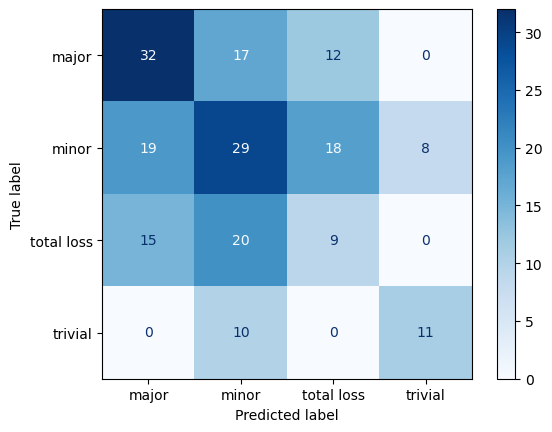

In [46]:
# Instantiate the base model
knn = KNeighborsClassifier()

# Generate predictions
y_pred_knn = base_model(X_train, y_train, X_test, knn)

# Evaluate the model performance
evaluate_model(y_test, y_pred_knn)

### Ensemble Methods

#### Random Forest

Classification Report 

              precision    recall  f1-score   support

           0       0.35      0.34      0.35        61
           1       0.36      0.26      0.30        74
           2       0.23      0.36      0.28        44
           3       0.53      0.43      0.47        21

    accuracy                           0.33       200
   macro avg       0.37      0.35      0.35       200
weighted avg       0.35      0.33      0.33       200



Confusion Matrix


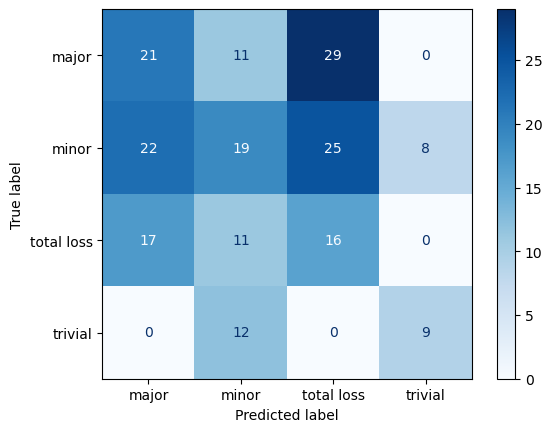

In [48]:
# Instantiate the base model
rf = RandomForestClassifier()

# Generate predictions
y_pred_rf = base_model(X_train, y_train, X_test, rf)

# Evaluate the model performance
evaluate_model(y_test, y_pred_rf)

#### XGBoost

Classification Report 

              precision    recall  f1-score   support

           0       0.38      0.38      0.38        61
           1       0.39      0.32      0.35        74
           2       0.17      0.23      0.19        44
           3       0.67      0.57      0.62        21

    accuracy                           0.34       200
   macro avg       0.40      0.38      0.39       200
weighted avg       0.37      0.34      0.35       200



Confusion Matrix


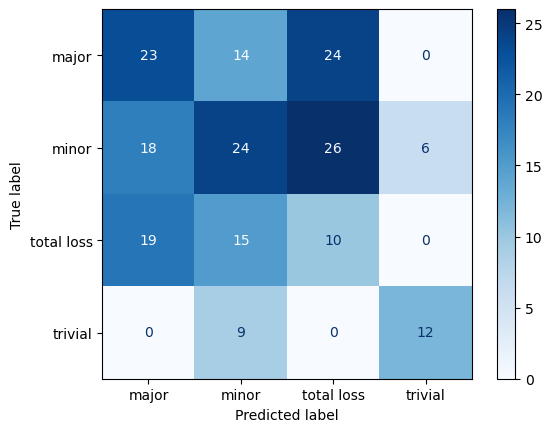

In [49]:
# Instantiate the base model
xgb = XGBClassifier()

# Generate predictions
y_pred_xgb = base_model(X_train, y_train, X_test, xgb)

# Evaluate the model performance
evaluate_model(y_test, y_pred_xgb)